In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
#from collections import Counter
#import warnings
#warnings.filterwarnings("ignore")
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [ ]:
d = pd.read_csv('Telecom_customer churn.csv')
df = d.copy() # copy for easier experimentation during code writing.
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
print(df.shape) # row x columns of data
print(df.ndim) # dimension of data
print(df.size) # size of data

(100000, 100)
2
10000000


In [ ]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [ ]:
df.drop(["Customer_ID"], axis = 1, inplace=True)

In [ ]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [ ]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 50326
num of pepole who churn: 49317


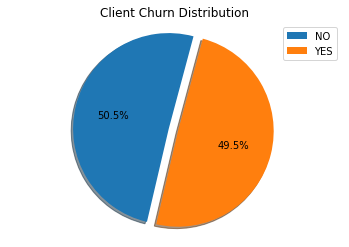

In [ ]:
sizes = [50326,49317]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

In [ ]:
df.columns[df.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [ ]:
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [ ]:
df.dropna(inplace=True)

In [ ]:
display(df.shape)

(26705, 99)

In [ ]:
sum(df.isnull().sum()>0)

0

In [ ]:
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
crclscod --> 43
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 3
refurb_new --> 2
hnd_webcap --> 2
ownrent --> 2
dwlltype --> 2
marital --> 5
infobase --> 1
HHstatin --> 6
dwllsize --> 15
ethnic --> 16
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [ ]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [ ]:
display(df.shape)
display(df2.shape)

(26705, 99)

(26705, 195)

In [ ]:
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [ ]:
df2["churn"]= df2["churn"].apply(lambda x: 0 if  x==0 else 1  )

In [ ]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)
    
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 16023
X_test 10682
y_train 16023
y_test 10682


Naive Bayes Classification
accuracy:  0.5306122448979592
precision:  0.4967105263157895
recall:  0.030127693535514765
f1_score:  0.3916128241096339


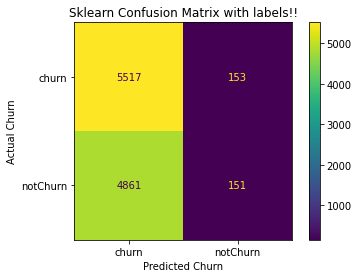

In [ ]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 18693
X_test 8012
y_train 18693
y_test 8012


Naive Bayes Classification
accuracy:  0.5468047928107839
precision:  0.5802469135802469
recall:  0.10066934404283802
f1_score:  0.4472992791148289


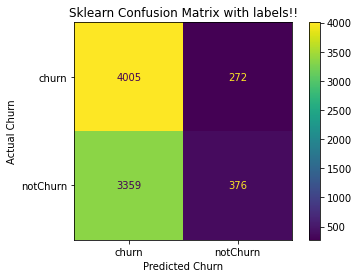

In [ ]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 21364
X_test 5341
y_train 21364
y_test 5341


Naive Bayes Classification
accuracy:  0.5568245646882606
precision:  0.5746799431009957
recall:  0.1634304207119741
f1_score:  0.48557998647668194


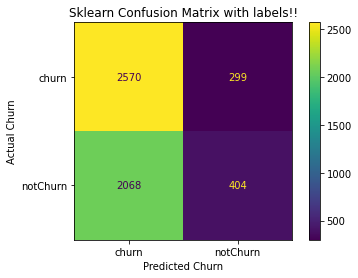

In [ ]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 24034
X_test 2671
y_train 24034
y_test 2671


Naive Bayes Classification
accuracy:  0.5672032946461999
precision:  0.6264044943820225
recall:  0.17897271268057785
f1_score:  0.4984778522779271


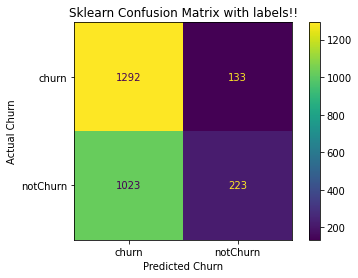

In [ ]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
752/752 [==============================] - 2s 2ms/step - loss: 16.3635 - accuracy: 0.5305
Epoch 2/50
752/752 [==============================] - 1s 2ms/step - loss: 1.0286 - accuracy: 0.5395
Epoch 3/50
752/752 [==============================] - 1s 2ms/step - loss: 0.8883 - accuracy: 0.5456
Epoch 4/50
752/752 [==============================] - 1s 2ms/step - loss: 0.8435 - accuracy: 0.5553
Epoch 5/50
752/752 [==============================] - 2s 2ms/step - loss: 0.8110 - accuracy: 0.5528
Epoch 6/50
752/752 [==============================] - 2s 2ms/step - loss: 0.7918 - accuracy: 0.5595
Epoch 7/50
752/752 [==============================] - 2s 2ms/step - loss: 0.7880 - accuracy: 0.5552
Epoch 8/50
752/752 [==============================] - 1s 2ms/step - loss: 0.7460 - accuracy: 0.5667
Epoch 9/50
752/752 [==============================] - 1s 2ms/step - loss: 0.7644 - accuracy: 0.5575
Epoch 10/50
752/752 [==============================] - 1s 2ms/step - loss: 0.7345 - accuracy: 0.564

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 16023
X_test 10682
y_train 16023
y_test 10682


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
len(X_test)

10682

In [ ]:
len(y_pred)

10682

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
 print(confusion_matrix(y_test, y_pred))
 print(accuracy_score(y_test,y_pred))
 print(precision_score(y_test,y_pred))
 print(recall_score(y_test,y_pred))
 print(f1_score(y_test,y_pred))

[[ 961 4709]
 [ 411 4601]]
0.5206890095487736
0.4941997851772288
0.9179968076616122
0.6425080296048039


In [ ]:
 X = df2.drop('churn', axis=1)
 y = df2['churn']

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 print("X_train",len(X_train))
 print("X_test",len(X_test))
 print("y_train",len(y_train))
 print("y_test",len(y_test))

X_train 18693
X_test 8012
y_train 18693
y_test 8012


In [ ]:
 y_pred = ann.predict(X_test)
 y_pred = (y_pred > 0.5)

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
 print(confusion_matrix(y_test, y_pred))
 print(accuracy_score(y_test,y_pred))
 print(precision_score(y_test,y_pred))
 print(recall_score(y_test,y_pred))
 print(f1_score(y_test,y_pred))

[[ 730 3547]
 [ 316 3419]]
0.5178482276585122
0.49081251794430086
0.9153949129852744
0.6390057004018316


In [ ]:
 X = df2.drop('churn', axis=1)
 y = df2['churn']

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 print("X_train",len(X_train))
 print("X_test",len(X_test))
 print("y_train",len(y_train))
 print("y_test",len(y_test))

X_train 21364
X_test 5341
y_train 21364
y_test 5341


In [ ]:
 y_pred = ann.predict(X_test)
 y_pred = (y_pred > 0.5)

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
 print(confusion_matrix(y_test, y_pred))
 print(accuracy_score(y_test,y_pred))
 print(precision_score(y_test,y_pred))
 print(recall_score(y_test,y_pred))
 print(f1_score(y_test,y_pred))

[[ 508 2361]
 [ 208 2264]]
0.5190039318479686
0.4895135135135135
0.9158576051779935
0.6380160631252643


In [ ]:
 X = df2.drop('churn', axis=1)
 y = df2['churn']

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
 print("X_train",len(X_train))
 print("X_test",len(X_test))
 print("y_train",len(y_train))
 print("y_test",len(y_test))

X_train 24034
X_test 2671
y_train 24034
y_test 2671


In [ ]:
 y_pred = ann.predict(X_test)
 y_pred = (y_pred > 0.5)

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
 print(confusion_matrix(y_test, y_pred))
 print(accuracy_score(y_test,y_pred))
 print(precision_score(y_test,y_pred))
 print(recall_score(y_test,y_pred))
 print(f1_score(y_test,y_pred))

[[ 242 1183]
 [ 108 1138]]
0.5166604268064395
0.4903059026281775
0.913322632423756
0.6380712082982899


In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 16023
X_test 10682
y_train 16023
y_test 10682


Decision Tree Classification
accuracy:  0.555982025837858
precision:  0.5267342476644802
recall:  0.5287310454908221
f1_score:  0.5560294398555091


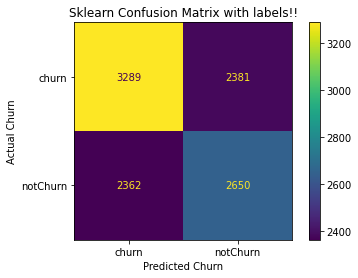

In [ ]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 18693
X_test 8012
y_train 18693
y_test 8012


Decision Tree Classification
accuracy:  0.5657763354967549
precision:  0.5351648351648352
recall:  0.5215528781793842
f1_score:  0.5653643816107187


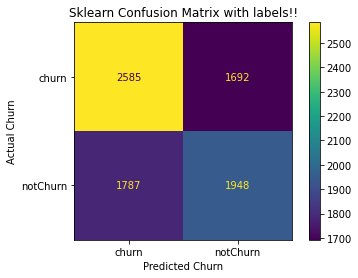

In [ ]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 21364
X_test 5341
y_train 21364
y_test 5341


Decision Tree Classification
accuracy:  0.5474630219060101
precision:  0.5109430959013131
recall:  0.5194174757281553
f1_score:  0.5476956041439389


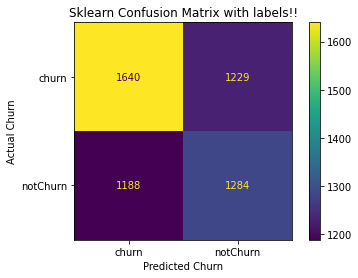

In [ ]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 24034
X_test 2671
y_train 24034
y_test 2671


Decision Tree Classification
accuracy:  0.5499812804193186
precision:  0.5177705977382876
recall:  0.514446227929374
f1_score:  0.549886449850143


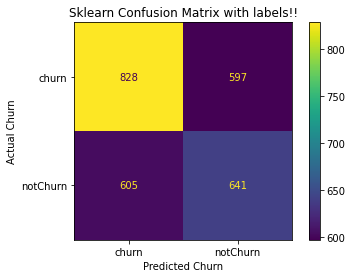

In [ ]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 16023
X_test 10682
y_train 16023
y_test 10682


KNN Classification
accuracy:  0.5354802471447294
precision:  0.5056280954524989
recall:  0.4481245011971269
f1_score:  0.5325925605995065


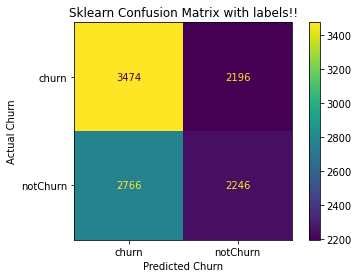

In [ ]:
#knn
knn_model = modeling(KNeighborsClassifier, "KNN Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 18693
X_test 8012
y_train 18693
y_test 8012


KNN Classification
accuracy:  0.542061907139291
precision:  0.5098566308243727
recall:  0.4570281124497992
f1_score:  0.5394621659593226


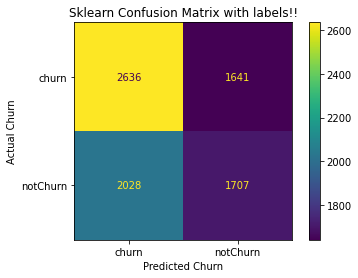

In [ ]:
#knn
knn_model = modeling(KNeighborsClassifier, "KNN Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 21364
X_test 5341
y_train 21364
y_test 5341


KNN Classification
accuracy:  0.5407227111027897
precision:  0.5042889390519187
recall:  0.4518608414239482
f1_score:  0.5379754388430403


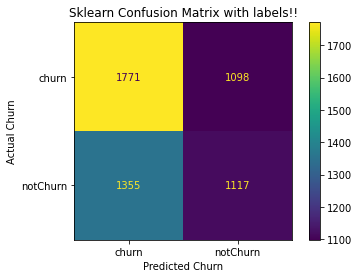

In [ ]:
#knn
knn_model = modeling(KNeighborsClassifier, "KNN Classification")

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 24034
X_test 2671
y_train 24034
y_test 2671


KNN Classification
accuracy:  0.5436166229876451
precision:  0.5128449096098954
recall:  0.43258426966292135
f1_score:  0.538857929427113


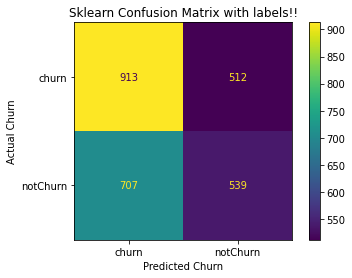

In [ ]:
#knn
knn_model = modeling(KNeighborsClassifier, "KNN Classification")

Accuracy vs Training Ratio Graph

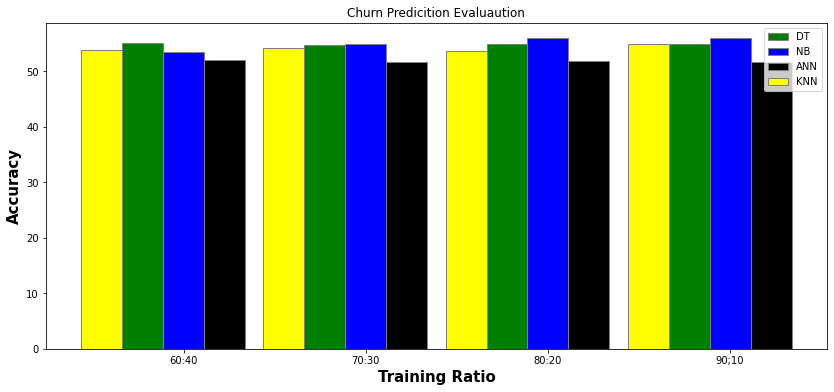

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_items=4
margin = 0.05
barWidth = (1.-2.*margin)/num_items
# set width of bar
#barWidth = 0.25
fig = plt.subplots(figsize =(14, 6))

# set height of bar

DT=[55.2,54.7,55.0,54.9]
NB=[53.5,55.0,56.0,56.0]
ANN=[52.06,51.78,51.90,51.66]
KNN=[53.9,54.2,53.7,55.0]
# Set position of bar on X axis

br2 = np.arange(len(DT))
br3 = np.arange(len(NB))
br4 = np.arange(len(ANN))
br5 = np.arange(len(KNN))
br2 = [x + barWidth for x in br2]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot

plt.bar(br2, DT, color ='g', width = barWidth,
		edgecolor ='grey', label ='DT')
plt.bar(br3, NB, color ='b', width = barWidth,
                edgecolor ='grey', label ='NB')
plt.bar(br4, ANN, color ='black', width = barWidth,
		edgecolor ='grey', label ='ANN')
plt.bar(br5, KNN, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='KNN')
# Adding Xticks
plt.xlabel('Training Ratio', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(KNN))],['60:40','70:30','80:20','90;10'])
plt.title("Churn Predicition Evaluaution")
plt.legend(loc=1)
plt.show()

Precision Vs Training Ratio

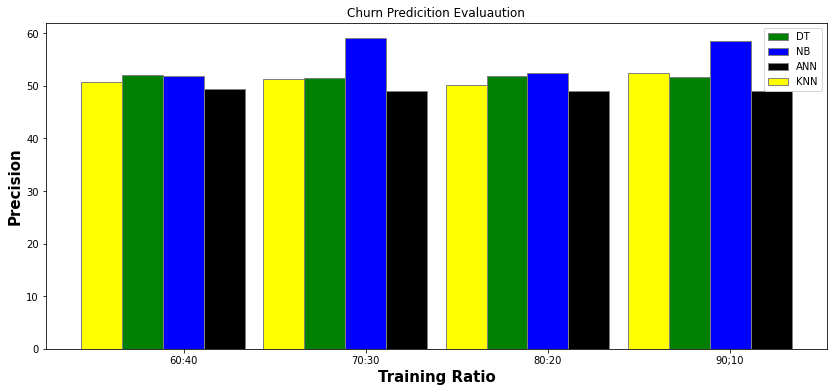

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_items=4
margin = 0.05
barWidth = (1.-2.*margin)/num_items
# set width of bar
#barWidth = 0.25
fig = plt.subplots(figsize =(14, 6))

# set height of bar

DT=[51.99,51.54,51.80,51.75]
NB=[51.88,59.05,52.48,58.57]
ANN=[49.41,49.08,48.95,49.03]
KNN=[50.63,51.21,50.22,52.48]
# Set position of bar on X axis

br2 = np.arange(len(DT))
br3 = np.arange(len(NB))
br4 = np.arange(len(ANN))
br5 = np.arange(len(KNN))
br2 = [x + barWidth for x in br2]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot

plt.bar(br2, DT, color ='g', width = barWidth,
		edgecolor ='grey', label ='DT')
plt.bar(br3, NB, color ='b', width = barWidth,
                edgecolor ='grey', label ='NB')
plt.bar(br4, ANN, color ='black', width = barWidth,
		edgecolor ='grey', label ='ANN')
plt.bar(br5, KNN, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='KNN')
# Adding Xticks
plt.xlabel('Training Ratio', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(KNN))],['60:40','70:30','80:20','90;10'])
plt.title("Churn Predicition Evaluaution")
plt.legend(loc=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_items=4
margin = 0.05
barWidth = (1.-2.*margin)/num_items
# set width of bar
#barWidth = 0.25
fig = plt.subplots(figsize =(14, 6))

# set height of bar

DT=[52.03,51.00,52.44,48.99]
NB=[3.01,10.06,16.343,17.897]
ANN=[96.32,96.20,51.91,96.79]
KNN=[45.71,45.60,44.25,47.39]
# Set position of bar on X axis

br2 = np.arange(len(DT))
br3 = np.arange(len(NB))
br4 = np.arange(len(ANN))
br5 = np.arange(len(KNN))
br2 = [x + barWidth for x in br2]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot

plt.bar(br2, DT, color ='g', width = barWidth,
		edgecolor ='grey', label ='DT')
plt.bar(br3, NB, color ='b', width = barWidth,
                edgecolor ='grey', label ='NB')
plt.bar(br4, ANN, color ='black', width = barWidth,
		edgecolor ='grey', label ='ANN')
plt.bar(br5, KNN, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='KNN')
# Adding Xticks
plt.xlabel('Training Ratio', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(KNN))],['60:40','70:30','80:20','90;10'])
plt.title("Churn Predicition Evaluaution")
plt.legend(loc=1)
plt.show()